In [16]:
import torch
from torch import nn
import d2l_torch as d2l

batch_size = 256
train_iter, test_iter = d2l.load_data_fashion_mnist(batch_size)

In [ ]:
num_inputs, num_outputs, num_hiddens = 784, 10, 256
W1 = nn.Parameter(torch.normal(0, 0.001, (num_inputs, num_hiddens), requires_grad=True))
b1 = torch.zeros(num_hiddens, requires_grad=True)
W2 = nn.Parameter(torch.normal(0, 0.001, (num_hiddens, num_outputs), requires_grad=True))
b2 = torch.zeros(num_outputs, requires_grad=True)
#权重设置成0会怎么样？
params = [W1, b1, W2, b2]
print(params)

[Parameter containing:
tensor([[-5.5203e-03,  9.9493e-03,  1.3305e-02,  ...,  1.0114e-02,
         -1.9431e-06, -1.6507e-03],
        [ 1.2862e-02, -8.2316e-03,  1.2764e-02,  ...,  3.2586e-03,
          5.3678e-04,  1.8700e-03],
        [-1.2131e-02,  7.2611e-03,  9.2789e-03,  ...,  1.6951e-02,
          1.0963e-02,  2.6178e-03],
        ...,
        [ 1.4671e-03,  9.9006e-03, -1.6628e-02,  ...,  5.8981e-03,
          3.2497e-03,  7.0910e-03],
        [ 4.5803e-03,  9.3198e-03, -5.0197e-03,  ...,  1.1538e-02,
         -7.9816e-04,  1.0666e-03],
        [-7.0172e-03, -9.4830e-03, -3.9411e-03,  ..., -5.2099e-03,
         -5.5421e-03,  1.2844e-02]], requires_grad=True), tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 

In [23]:
def relu(X):
    a = torch.zeros_like(X)
    return torch.max(X, a)

def softmax(X):
    X_exp = torch.exp(X)
    partition = X_exp.sum(axis = 1, keepdim=True)
    return X_exp / partition

def net(X):
    H = relu(X.reshape((-1, num_inputs)) @ W1 + b1)
    return softmax(H @ W2 + b2)

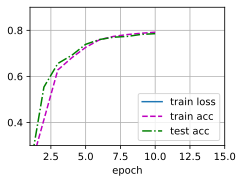

In [ ]:
loss = nn.CrossEntropyLoss(reduction='none')
lr = 0.1
num_epochs = 15
updater = torch.optim.SGD(params, lr=lr)
d2l.train_ch3(net, train_iter, test_iter, loss, num_epochs, updater)